# I manually created this file by watch youtube

https://www.youtube.com/watch?v=ZYdCDUfnVtk

https://docs.python.org/3/reference/datamodel.html

## Yes, At first glance it looks intimidating, but a little effor will return handsome rewards

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import random

## A Simple object wo work with

In [19]:
class Region():
    """
    A Class to generate a number of random points on a specified interval
    
    Arugments:
    region -- a tuple specifying the high and low sampling bounds; inclusive
    cnt    -- number of points to generate
    
    Points are selected randomly (uniform distribution) between interval bounds
    """
    
    def __init__(self, region, cnt):
        """How to build one."""
        self._region  = region
        self._cnt     = cnt
        self._samples = []
        lo, hi        = region
        for i in range(cnt):
            self._samples.append(random.uniform(lo, hi))
            
    def __iter__(self):
        """What to do for things like 'for ...' loop """
        for s in self._samples:
            # https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do
            yield s
        return
    
    def __str__(self):
        """What to do when asked to display one"""
        rep = "-- region --\n"
        rep += str(self._region) + "\n"
        rep += "-- samples --\n"
        rep += str(self._samples) + "\n"
        rep += "-- point count --\n"
        rep += str(self._cnt) + "\n"
        
        return(rep)
    
    def __len__(self):
        """What to do when 'len()' is called on once."""
        return(self._cnt)
    
    def __call__(self):
        """What to do when r=Region(..); r()"""
        return(self._samples)
    
    def __getitem__(self, idx):
        """What to do when: r = Region(..); r[idx]"""
        if ((idx < 0) or (idx > self._cnt)):
            raise IndexError("Region: index out of bounds")
        return(self._samples[idx])

## Through the magic of the double underscore or dunder methods we can specify what python should do (meaning; semantics) when it encounters certain common syntactical elements. I'll show what I mean by this.

## BTW, I've only defined a few and there are lots of the 'dunder' methods available but time is short ...

In [14]:
help(Region)

Help on class Region in module __main__:

class Region(builtins.object)
 |  A Class to generate a number of random points on a specified interval
 |  
 |  Arugments:
 |  region -- a tuple specifying the high and low sampling bounds; inclusive
 |  cnt    -- number of points to generate
 |  
 |  Points are selected randomly (uniform distribution) between interval bounds
 |  
 |  Methods defined here:
 |  
 |  __call__(self)
 |      What to do when r=Region(..); r()
 |  
 |  __getitem__(self, idx)
 |      What to do when: r = Region(..); r[idx]
 |  
 |  __init__(self, region, cnt)
 |      How to build one.
 |  
 |  __iter__(self)
 |      What to do for things like 'for ...' loop
 |  
 |  __len__(self)
 |      What to do when 'len()' is called on once.
 |  
 |  __str__(self)
 |      What to do when asked to display one
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variable

## Also, let's make a default object to see what the 'out of box' behavior is.

In [15]:
class Thing():
    pass

## Now, let's make a couple of these objects

In [20]:
t = Thing()
r = Region((0,2), 3)

## Now, what? Let's try and print them.

In [17]:
print(t)

In [21]:
print(r)

-- region --
(0, 2)
-- samples --
[1.7505239290639825, 1.4072942278213767, 1.808429409847983]
-- point count --
3



## This is the '__str()__' method at works.

## It's up to a composite to object to specify it's length by defining the __len__() method; for some objects it makes no sense to do so. But Region does define it so ...

In [22]:
len(t)

TypeError: object of type 'Thing' has no len()

In [23]:
len(r)

3

## Since Region has a length it would see to make sense to be able to iterate over it. Iteration is enabled bgy defining the __iter__() method.

In [24]:
for p in r:
    print(p)

1.7505239290639825
1.4072942278213767
1.808429409847983


## Region also specifies __getitem__(), we can index it.

In [25]:
r[0]

1.7505239290639825

In [26]:
r[4]

IndexError: Region: index out of bounds

## BTW, sometimes you want to leverage indexing semantics (e.g. obj[idx]) for something that doens't have anything to index.

In [27]:
class PowerTwo():
    def __getitem__(self, idx):
        return (2**idx)

In [28]:
p2 = PowerTwo()
print(p2[1], p2[3], p2[10], p2[16])

2 8 1024 65536


## But I disagree ...

## By specifying a __call__() method we can specify what it means to call an instance.

In [29]:
r()

[1.7505239290639825, 1.4072942278213767, 1.808429409847983]

## Here we just return the sample lists.

## OK. Fine. Nice. So What?

### let's define a simple function to compute the mean. The sum() function expects its argument to be an iterable.

In [30]:
def mean(x):
    return sum(x)/len(x)

In [31]:
l = [1,2,3]
mean(l)

2.0

## Region instances are iterable too because they have the iter() method. So mean() will also work for them.

In [34]:
r = Region((0,1), 400)
#print(r)
mean(r)

0.5297952672082007

## Turns out that expecting arguments to be iterable is very very common. Here plot() has no idea of the composition of Region instances but things work just as we would expects

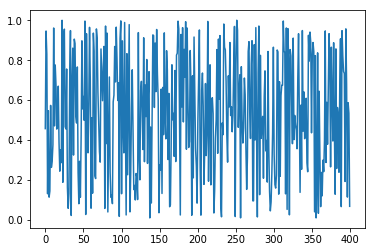

In [35]:
plt.plot(r)

## So an object that behaves reasonably allows you to leverage pretty much everything you love about Python without really knowing the details about the object.

## That coupled with jupyter notebooks gives you some very power tooling!